In [1]:
import umap
import matplotlib.pyplot as plt
import joblib
import numpy as np

In [2]:
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/shuffled_train_data.sav', 'rb') as fr:
    [features_runlist, targets_runlist] = joblib.load(fr)

In [3]:
## first generate embedding of all samples
reducer = umap.UMAP(n_neighbors=60, n_components=2, min_dist=0.0, random_state=42)
i = 5
embeddings_ = reducer.fit_transform(features_runlist[i])

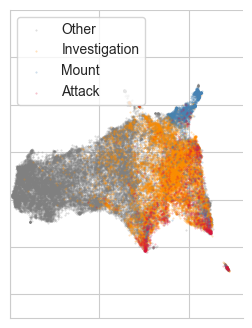

In [4]:
behavior_types = ['Other',  'Investigation', 'Mount', 'Attack']
cmap = ['crimson', 'darkorange', 'steelblue', 'k']
fig = plt.figure(figsize=(3, 4))
ax = fig.add_subplot()
for b in [3, 1, 2, 0]:
    if b == 3:
        idx_b_embed = np.where(targets_runlist[i]==int(b))[0]
        ax.scatter(embeddings_[idx_b_embed, 0],
                   embeddings_[idx_b_embed, 1],
                   s=0.2, alpha=0.3, c='grey')
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    else:
        idx_b_embed = np.where(targets_runlist[i]==int(b))[0]
        ax.scatter(embeddings_[idx_b_embed, 0],
                   embeddings_[idx_b_embed, 1],
                   s=0.2,
                   alpha=0.3,
                   c=cmap[int(b)])
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    ax.legend(behavior_types)
    ax.set_xlim([0, 13])
    ax.set_ylim([-5, 8])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.show()

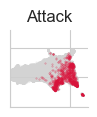

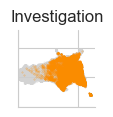

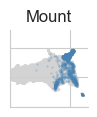

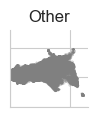

In [5]:
behavior_types = ['Attack', 'Investigation', 'Mount', 'Other']
for b in np.unique(targets_runlist[i]):
    if b == 3:
        fig, ax = plt.subplots(1, 1, figsize=(1, 1))
        idx_b_embed = np.where(targets_runlist[i]==int(b))[0]
        idx_not_b = np.where(targets_runlist[i]!=int(b))[0]
        ax.scatter(embeddings_[idx_not_b, 0],
                   embeddings_[idx_not_b, 1],
                   s=0.1, alpha=0.5, c='lightgray')
        ax.scatter(embeddings_[idx_b_embed, 0],
                   embeddings_[idx_b_embed, 1],
                   s=0.1, alpha=0.5, c='gray')
    else:
        fig, ax = plt.subplots(1, 1, figsize=(1, 1))
        idx_b_embed = np.where(targets_runlist[i]==int(b))[0]
        idx_not_b = np.where(targets_runlist[i]!=int(b))[0]
        ax.scatter(embeddings_[idx_not_b, 0],
                   embeddings_[idx_not_b, 1],
                   s=0.1, alpha=0.5, c='lightgray')
        ax.scatter(embeddings_[idx_b_embed, 0],
                   embeddings_[idx_b_embed, 1],
                   s=0.1, alpha=0.5, c=cmap[int(b)])
    ax.set_title(behavior_types[int(b)])
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xlim([0, 13])
    ax.set_ylim([-5, 8])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()